# <font color=pink> Multiple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("advertising.csv")

# EDA Exploratory Data Analysis

In [3]:
df.head() #ilk beş satır

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.tail() #son beş satır

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
df.info() #hangi sutunun hangi verilerden oluştuğunu gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe() #istatistik

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr() #korelasyon

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
df.shape

(200, 4)

In [10]:
df["TV"].value_counts() 

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

In [11]:
df["TV"].value_counts(normalize=True) #markaların yüzdesi

199.8    0.010
109.8    0.010
17.2     0.010
177.0    0.010
222.4    0.010
         ...  
139.3    0.005
216.8    0.005
199.1    0.005
26.8     0.005
232.1    0.005
Name: TV, Length: 190, dtype: float64

In [ ]:
#Eigen Value Eigen Vector - Öz değerler ve Öz vektör

In [14]:
import seaborn as sns #Grafikle gösterimi

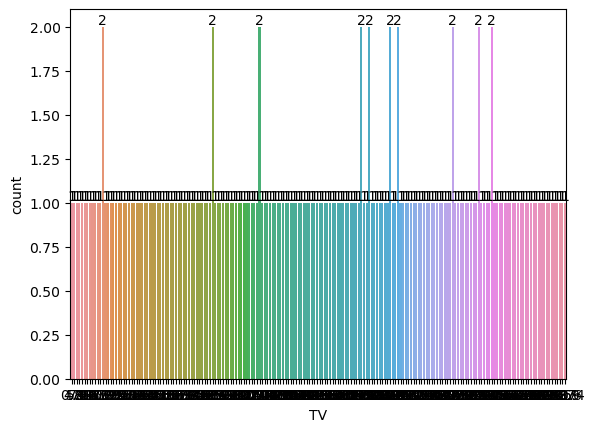

In [18]:
ax=sns.countplot(x=df["TV"]);
ax.bar_label(ax.containers[0]);

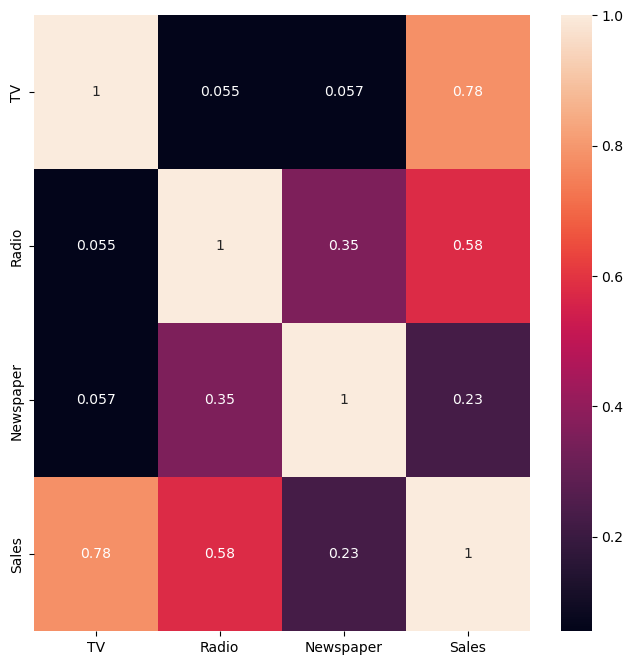

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True); #yüzdeliği ile beraber heatmap

In [20]:
abs(df.corr()['Sales'].sort_values(ascending=False)) #mutlak değer almak için kullanılır ascending-küçükten büyüğe sıralama
#Korelasyon çeşitleri = Pearson, Spearman, Kendall
#0.20 - 0.90 arasında olacak

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [35]:
#Feature Engineering - verinin aslında olmayan yeni sutunlar ekliyorsak

In [21]:
df.isnull().sum() #boş veri var mı diye bakılır

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

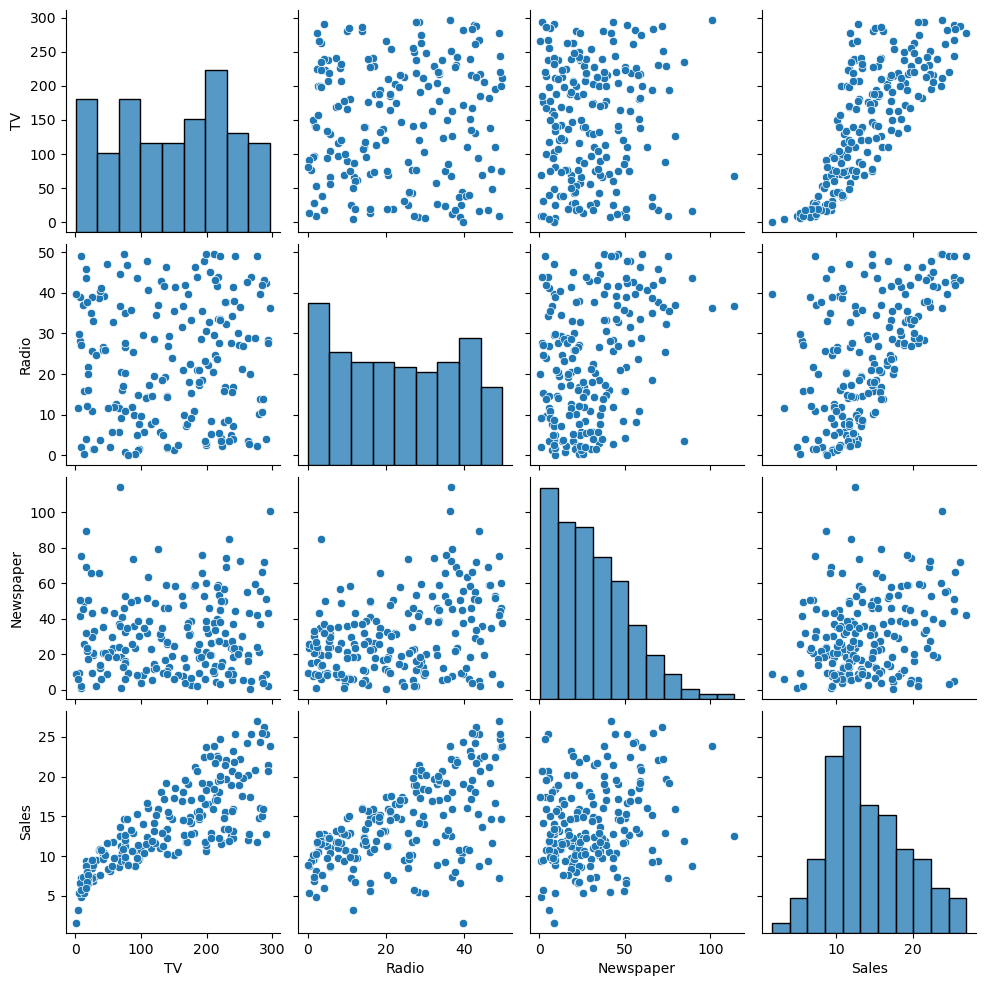

In [22]:
sns.pairplot(df) #sutunların diğer sutunlara göre nasıl değiştiğinin grafiği

# Modelling

In [23]:
x=df[["TV","Radio","Newspaper"]]
y=df[["Sales"]]

In [24]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [26]:
from sklearn.model_selection import train_test_split #Başarı oranımızı ölçmek için
#Seed -rondom olarak olmalı-   

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 
# -verinin %80 eğitmek için %20 si test etmek için kullanırız. ver ne kadar çoksa hata o kadar düşer
#42 olması verileri her çalıştırdığımda seed-random_state-

In [28]:
#bunu görmek için 
x_train.shape,x_test.shape

((160, 3), (40, 3))

In [29]:
#ilk makina öğrenmesi
from sklearn.linear_model import LinearRegression

In [30]:
lr=LinearRegression()

In [31]:
model=lr.fit(x_train,y_train) #eğitme

In [32]:
tahmin=model.predict(x_test) #tahmin

In [33]:
from sklearn.metrics import r2_score, mean_squared_error #r2-başarı oranı-

In [34]:
(mean_squared_error(tahmin,y_test))**0.5

1.7815996615334504

In [35]:
r2_score(tahmin,y_test)

0.8791069137120033

In [36]:
x=df[["TV"]]
y=df[["Sales"]]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [38]:
model=lr.fit(x_train,y_train)
#modeli eğitmek için fit kullanırız

In [58]:
tahmin=model.predict(x_test)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
(mean_squared_error(tahmin,y_test))**0.5

3.194472431998898

In [61]:
r2_score(tahmin,y_test)

0.4227436514531997

In [62]:
x=df[["Radio"]]
y=df[["Sales"]]

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [64]:
model=lr.fit(x_train,y_train)

In [65]:
tahmin=model.predict(x_test)

In [66]:
(mean_squared_error(tahmin,y_test))**0.5

4.8216974799471926

In [67]:
r2_score(tahmin,y_test)

-1.5028989612552488

In [68]:
x=df[["Newspaper"]]
y=df[["Sales"]]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [70]:
model=lr.fit(x_train,y_train)

In [71]:
tahmin=model.predict(x_test)

In [72]:
(mean_squared_error(tahmin,y_test))**0.5

5.533600454969853

In [73]:
r2_score(tahmin,y_test)

-11.106066170529926

In [81]:
x=df[["TV"]]
y=df[["Sales"]]

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [83]:
model=lr.fit(x_train,y_train)

In [84]:
tahmin=model.predict(x_test)

In [85]:
(mean_squared_error(tahmin,y_test))**0.5

3.194472431998898

In [86]:
r2_score(tahmin,y_test)

0.4227436514531997

In [107]:
import matplotlib.pyplot as plt
import numpy as np

In [118]:
x_axis = np.array([x_test])
y_axis = [r2_score(tahmin,y_test)]

ValueError: x and y can be no greater than 2D, but have shapes (1, 40, 1) and (1,)

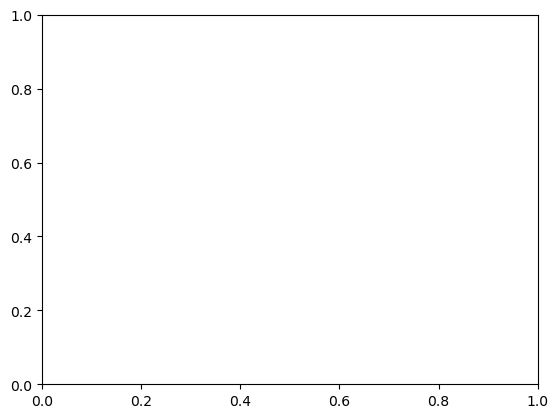

In [115]:
plt.plot(x_axis, y_axis)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

# son kodun sorununu anlayamadım hocam stackoverflow da alttaki gibi bir şeyler diyor ama ben neden anlayamıyorum

In [5]:
x_axis = np.array.array(size=(2, 1, 1))
x_axis.shape
>> (2, 1, 1)

x_axis = x_axis.reshape(-1,)
x_axis.shape
>> (2,)

SyntaxError: invalid syntax (4131141624.py, line 3)